In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import jieba
sns.set_style("darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")

In [2]:
items = []
with open("reviews.json","r",encoding='utf-8') as fp:
    for line in fp:
        review = json.loads(line)
        items.append(review)
items[0]

{'author': '豆友211872576',
 'pub_time': '2020-03-14 14:35:01',
 'rating': '',
 'title': '安家',
 'content': '贬低了这个行业，房屋中介专业重要，情商更重要，骚扰客户，窥探隐私，单位堵门，连哄带骗，这样没有情商的中介，现实中早就饿死了。贬低了这个行业，房屋中介专业重要，情商更重要，骚扰客户，窥探隐私，单位堵门，连哄带骗，这样没有情商的中介，现实中早就饿死了。看了这部剧的导演和创业时代一样就知道了结果，拍现代剧职场剧还有生活和现实经验，编真不行。'}

In [3]:
item_list = [[item['author'],item['pub_time'],item['rating'],item['title'],item['content']] for item in items]
review_df = pd.DataFrame(item_list,columns=['author','pub_time','rating','title','content'])

# 删除缺失数值
review_df.dropna(inplace=True)
# 将缺失的评论情况设置为放弃
review_df[review_df['rating']=='']['rating'] = '放弃'
# # 将字符串格式的时间转换为datatime类型
review_df['pub_time'] = pd.to_datetime(review_df['pub_time'])

Text(0, 0.5, '评论数量')

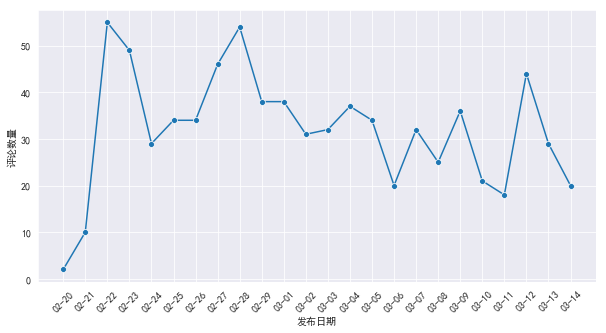

In [4]:
# 分析评论日期
import re
from matplotlib import dates

plt.figure(figsize=(10,5))

# 2. 添加一个新的pub_date
review_df['pub_date'] = review_df['pub_time'].dt.date
review_df = review_df[pd.to_datetime(review_df['pub_date']).dt.year>2019]
# # 3. 根据日期分组绘图
review_date_df = review_df.groupby(['pub_date']).count()
ax = sns.lineplot(x=review_date_df.index,y=review_date_df.author,marker='o')
# 设置显示所有时间
ax.set(xticks=review_date_df.index)
# 设置x轴旋转
_ = ax.set_xticklabels(review_date_df.index,rotation=45)
# 设置x轴格式
ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d"))
ax.set_xlabel("发布日期")
ax.set_ylabel("评论数量")

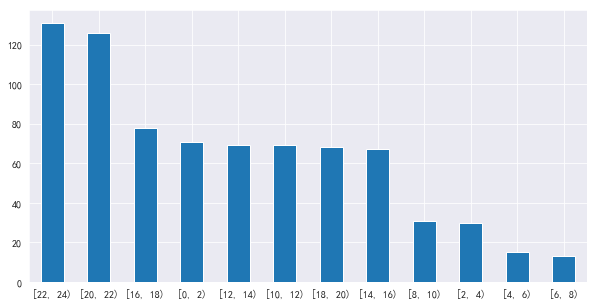

In [12]:
# 分析评论时间
import datetime
plt.figure(figsize=(10,5))
time_range = [0,2,4,6,8,10,12,14,16,18,20,22,24]
review_time_df = review_df['pub_time'].dt.hour
time_range_counts = pd.cut(review_time_df,bins=time_range,include_lowest=True,right=False).value_counts()
ax = time_range_counts.plot(kind="bar")
_ = ax.set_xticklabels(labels=time_range_counts.index,rotation=0)

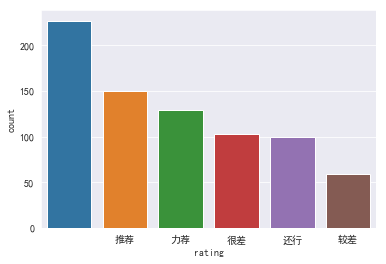

In [6]:
# 看下评论好坏的情况
sns.countplot(x='rating',data=review_df,order=review_df['rating'].value_counts().index)

In [16]:
# 电视剧人物的评分
# 力荐：+5，推荐：+4，还行：3，较差：2，很差：1
roles = {'房似锦':0,'徐文昌':0,'张乘乘':0,'王子健':0,'楼山关':0,'朱闪闪':0,'谢亭丰':0,'鱼化龙':0,'宫蓓蓓':0,'阚文涛':0}
role_names = list(roles.keys())
for name in role_names:
    jieba.add_word(name)
for row in review_df.index:
    rating = review_df.loc[row,'rating']
    if rating:
        content = review_df.loc[row,"content"]
        words = list(jieba.cut(content, cut_all=False))
        names = set(role_names).intersection(set(words))
        for name in names:
            if rating == '力荐':
                roles[name] += 5
            elif rating == '推荐':
                roles[name] += 4
            elif rating == '还行':
                roles[name] =3
            elif rating == '较差':
                roles[name] += 2
            elif rating == '很差':
                roles[name] += 1

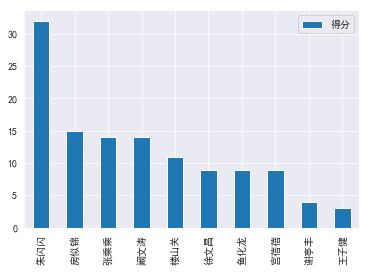

In [37]:
role_df = pd.DataFrame(list(roles.values()),index=list(roles.keys()),columns=['得分'])
role_df.sort_values('得分',inplace=True,ascending=False)
role_df.plot(kind='bar')

In [93]:
def generate_wc(string_data):
    # 文本预处理
    pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
    string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

    # 文本分词
    seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
    object_list = []
    remove_words = []
    with open("停用词库.txt",'r',encoding='utf-8') as fp:
        for word in fp:
            remove_words.append(word.replace("\n",""))

    for word in seg_list_exact: # 循环读出每个分词
        if word not in remove_words: # 如果不在去除词库中
            object_list.append(word) # 分词追加到列表

    # 词频统计
    word_counts = collections.Counter(object_list) # 对分词做词频统计
    word_counts_top20 = word_counts.most_common(20) # 获取前10最高频的词

    # 词频展示
    wc = wordcloud.WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
        background_color="#000000", # 设置背景图
        max_words=150, # 最多显示词数
        max_font_size=60, # 字体最大值
        width=707,
        height=490
    )

    wc.generate_from_frequencies(word_counts) # 从字典生成词云
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show() # 显示图像

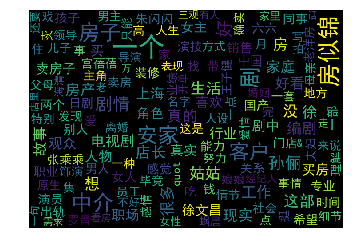

In [94]:

content_str = ""
for row in review_df.index:
    content = review_df.loc[row,'content']
    content_str += content

generate_wc(content_str)